In [1]:
#20BCE0969
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('HourStudied.csv')

In [3]:
df

,Hours studied,Result
0,29,0
1,15,0
2,33,1
3,28,1
4,39,1


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df[['Hours studied']],df.Result,train_size=0.8,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [6]:
y_pred=model.predict(x_test)
print('Test instances: ',x_test)
print('Probability of fail and pass of the test instance:',model.predict_proba(x_test))
print('Model score:',model.score(x_test,y_test))

Test instances:     Hours studied
2             33
Probability of fail and pass of the test instance: [[0.21232282 0.78767718]]
Model score: 1.0


In [7]:
import math
coeff,intercept=(model.coef_,model.intercept_)

In [8]:
def sigmoid(x):
    return(1/(1+math.exp(-x)))
def predict(hours):
    z=coeff*hours+intercept
    result=sigmoid(z)
    return result

In [9]:
#predict

hours=33
pred,predManually=(model.predict_proba([[hours]])[0][1],predict(hours))
print('Probability of pass for the student who studied for 33 hrs:')
print('Using builtin function:',pred)
print('Manually using the regression coefficients:',predManually)

Probability of pass for the student who studied for 33 hrs:
Using builtin function: 0.7876771761660456
Manually using the regression coefficients: 0.7876771761660456


C:\Users\nithy\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
print('Inference:')
if pred>=0.5:
    print('Since the probability of pass is greater than 0.5, the predicted result is pass(1)')
else:
    print('Since the probability of pass is less than 0.5, the predicted result is fail(0)')


Inference:
Since the probability of pass is greater than 0.5, the predicted result is pass(1)


Text(0, 0.5, 'Result (1=pass 0=fail)')

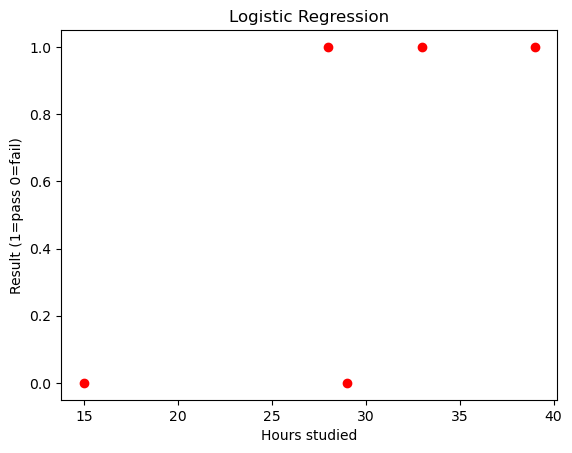

In [11]:
x,y=(df.iloc[:,0:-1].values,df.iloc[:,-1].values)
plt.scatter(x,y,marker='o',color='red')
plt.title('Logistic Regression')
plt.xlabel('Hours studied')
plt.ylabel('Result (1=pass 0=fail)')